In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = Path().absolute().parent / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [49]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: seqseq_grad_update
n_repeats: 10
scenario_params_list:
 - partners_count: 
     - 10
   amounts_per_partner: 
     - [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   samples_split_option: 
     - [[1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific']]
   samples_split_option: 
     - 'stratified'
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform' 
   gradient_updates_per_pass_count: 
     - 4
     - 8
     - 16
   epoch_count: 
     - 50
   minibatch_count: 
     - 1
     - 2
     - 5
     - 10


In [50]:
experiment_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 22 columns):
aggregation_weighting              298 non-null object
amounts_per_partner                298 non-null object
dataset_name                       298 non-null object
epoch_count                        298 non-null float64
final_relative_nb_samples          298 non-null object
gradient_updates_per_pass_count    298 non-null float64
is_early_stopping                  298 non-null float64
learning_computation_time_sec      298 non-null float64
minibatch_count                    298 non-null float64
mpl_nb_epochs_done                 298 non-null float64
mpl_test_score                     298 non-null float64
multi_partner_learning_approach    298 non-null object
nb_samples_used                    298 non-null float64
partners_count                     298 non-null float64
samples_split_option               298 non-null object
scenario_name                      298 non-null object
short_

In [51]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()
gradient_updates_per_pass_count_list = df.gradient_updates_per_pass_count.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()
df.head(5)

Random state [0 1 2 3 4 5 6]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
amounts_per_partner ['[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 22 columns):
aggregation_weighting              298 non-null object
amounts_per_partner                298 non-null object
dataset_name                       298 non-null object
epoch_count                        298 non-null float64
final_relative_nb_samples          298 non-null object
gradient_updates_per_pass_count    298 non-null float64
is_early_stopping                  298 non-null float64
learning_computation_time_sec      298 non-null float64
minibatch_count                    298 non-null float64
mpl_nb_epochs_done                 298 non-null float64
mpl_test_score                     298 non-null float64
multi_partner_learn

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id
0,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",4.0,1.0,61.552935,1.0,5.0,...,48000.0,10.0,stratified,scenario_1_repeat_1_2020-06-08_15h17_ff9,"10 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....",global,10000.0,48000.0,0,0
1,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",4.0,1.0,424.904709,2.0,18.0,...,48000.0,10.0,stratified,scenario_2_repeat_1_2020-06-08_15h18_dae,"10 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....",global,10000.0,48000.0,0,1
2,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",4.0,1.0,466.443118,5.0,7.0,...,48000.0,10.0,stratified,scenario_3_repeat_1_2020-06-08_15h25_83c,"10 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....",global,10000.0,48000.0,0,2
3,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",4.0,1.0,817.852535,10.0,5.0,...,48000.0,10.0,stratified,scenario_4_repeat_1_2020-06-08_15h32_31d,"10 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....",global,10000.0,48000.0,0,3
4,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",MNIST,50.0,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.099...",8.0,1.0,107.148238,1.0,8.0,...,48000.0,10.0,stratified,scenario_5_repeat_1_2020-06-08_15h46_bcc,"10 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0....",global,10000.0,48000.0,0,4


In [52]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 1.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 2.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 5.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 10.0'],
      dtype=object)

In [53]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
gradient_updates_per_pass_count: 4.0


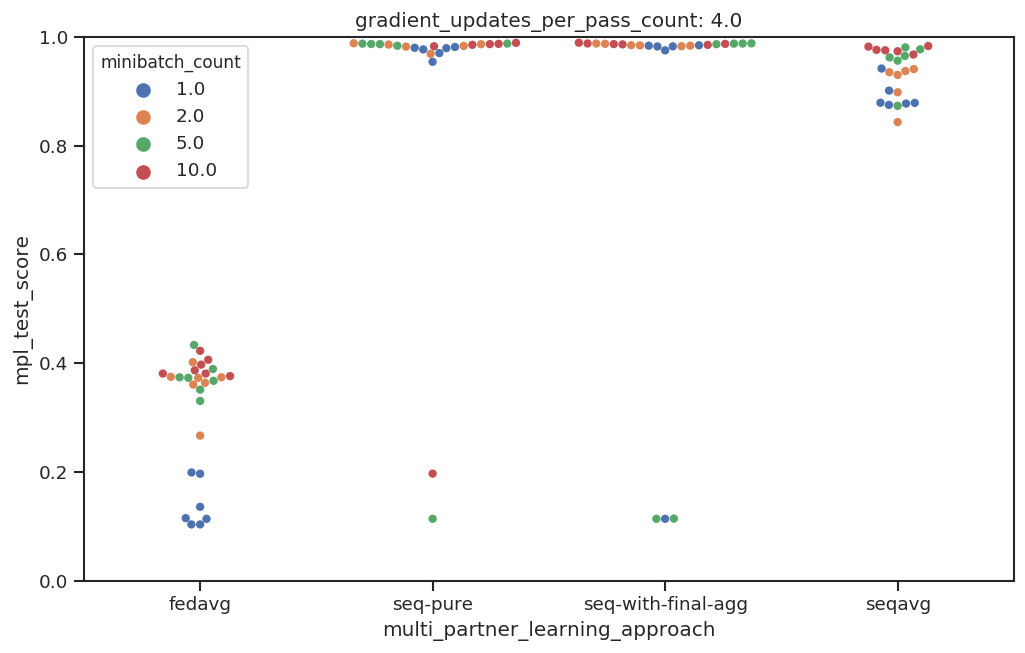

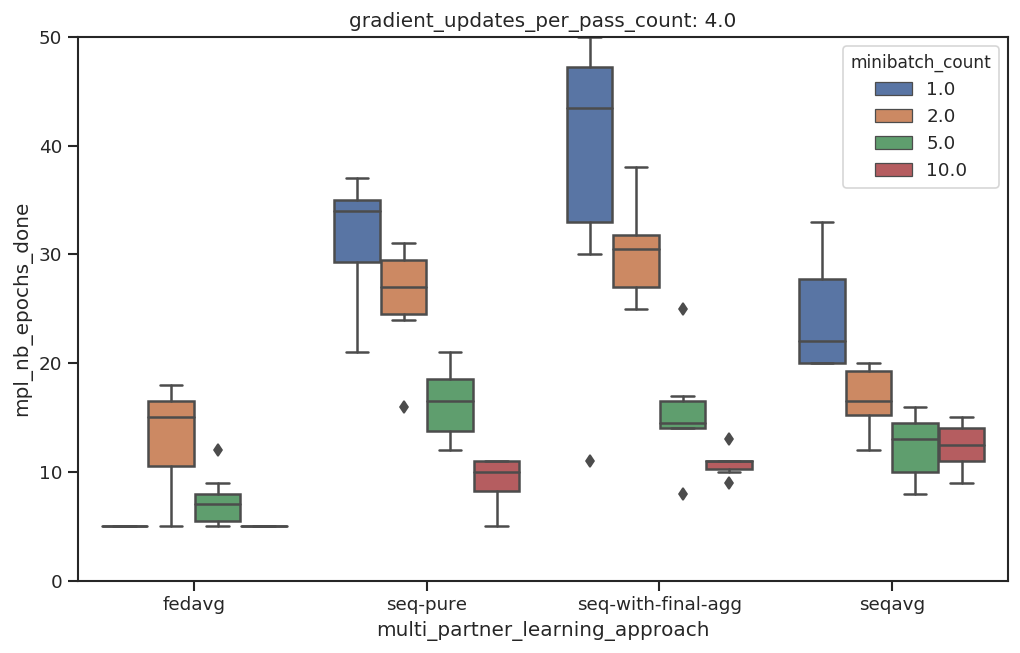

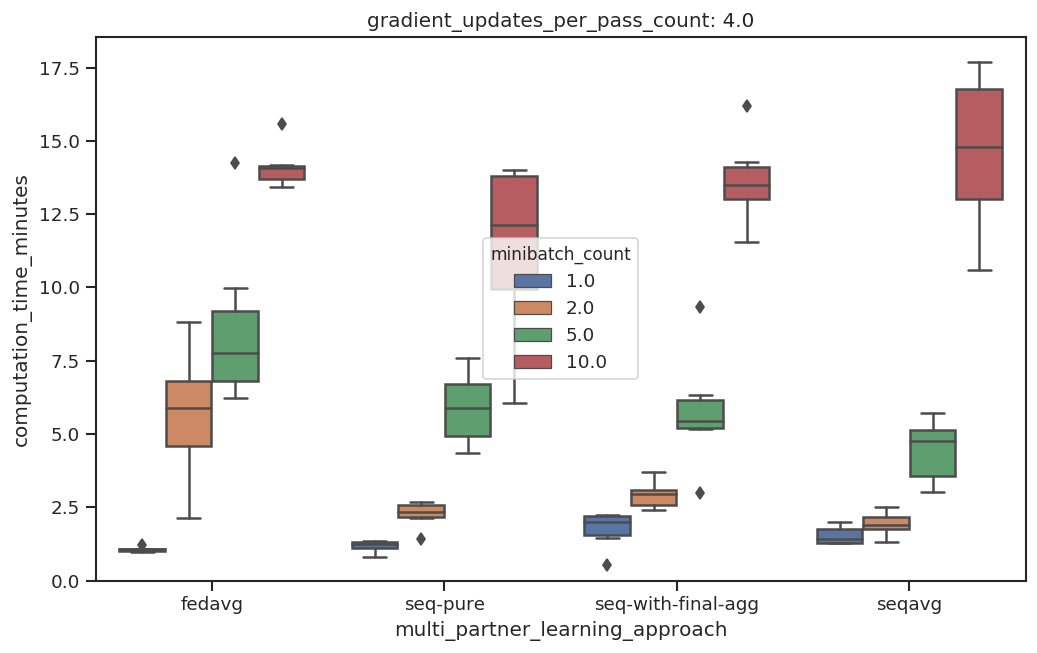

################################################
gradient_updates_per_pass_count: 8.0


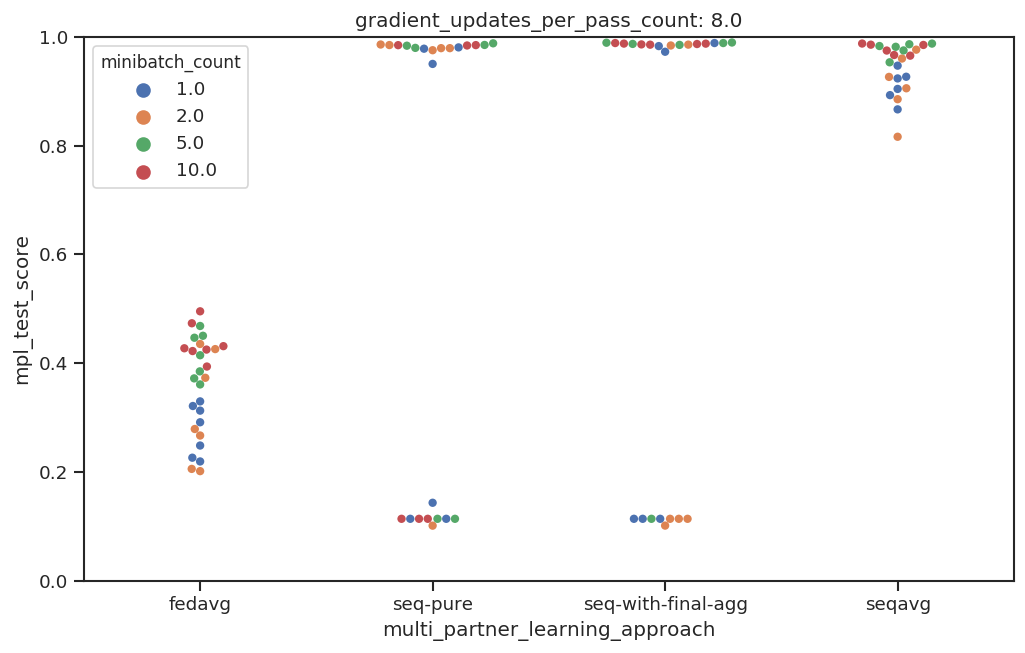

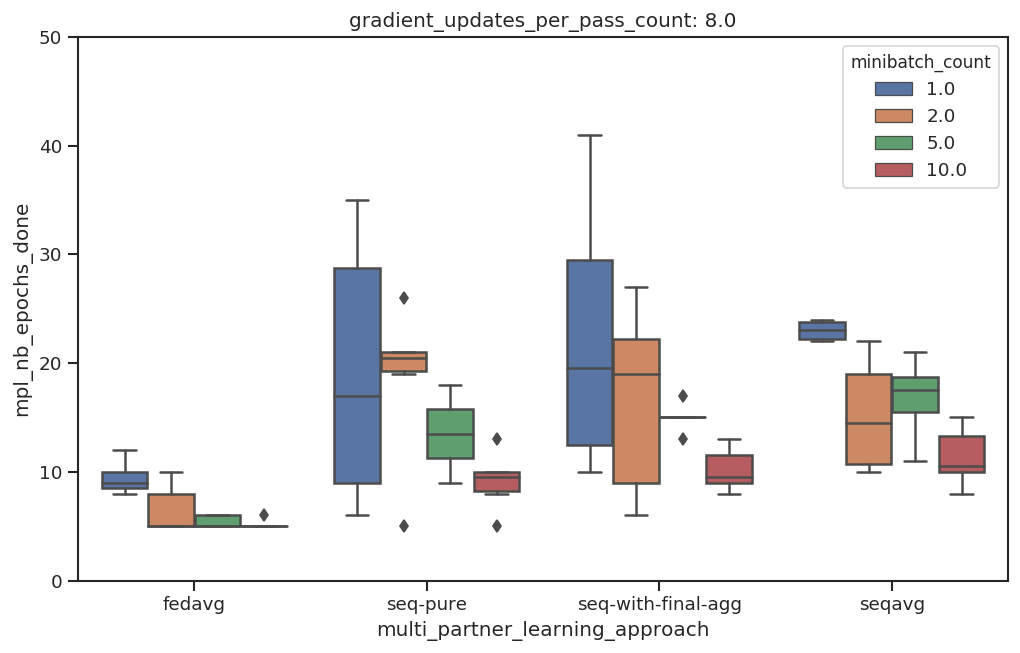

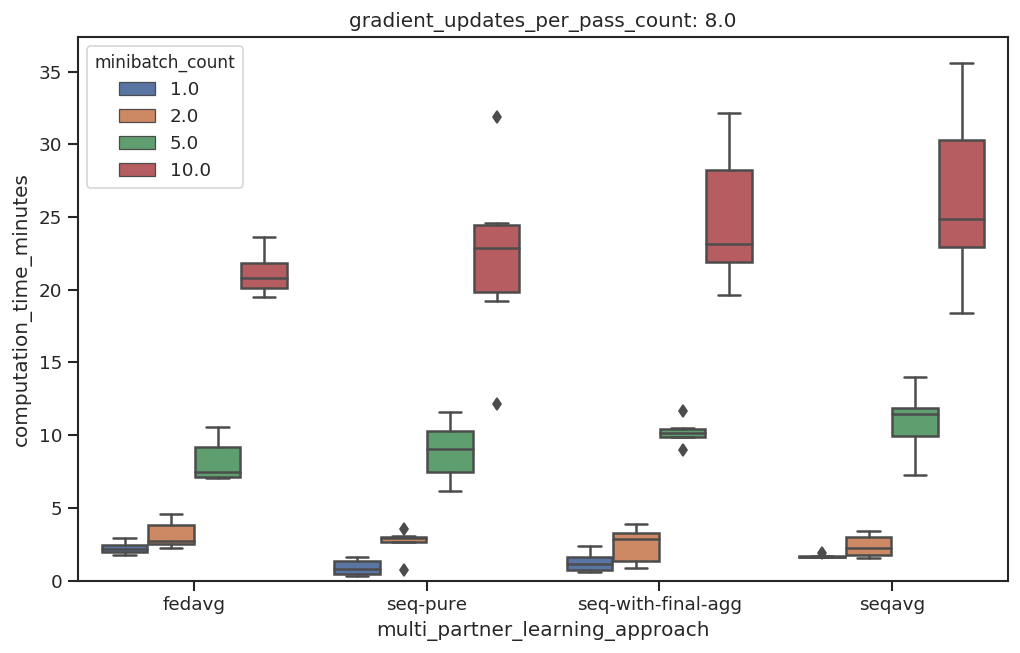

################################################
gradient_updates_per_pass_count: 16.0


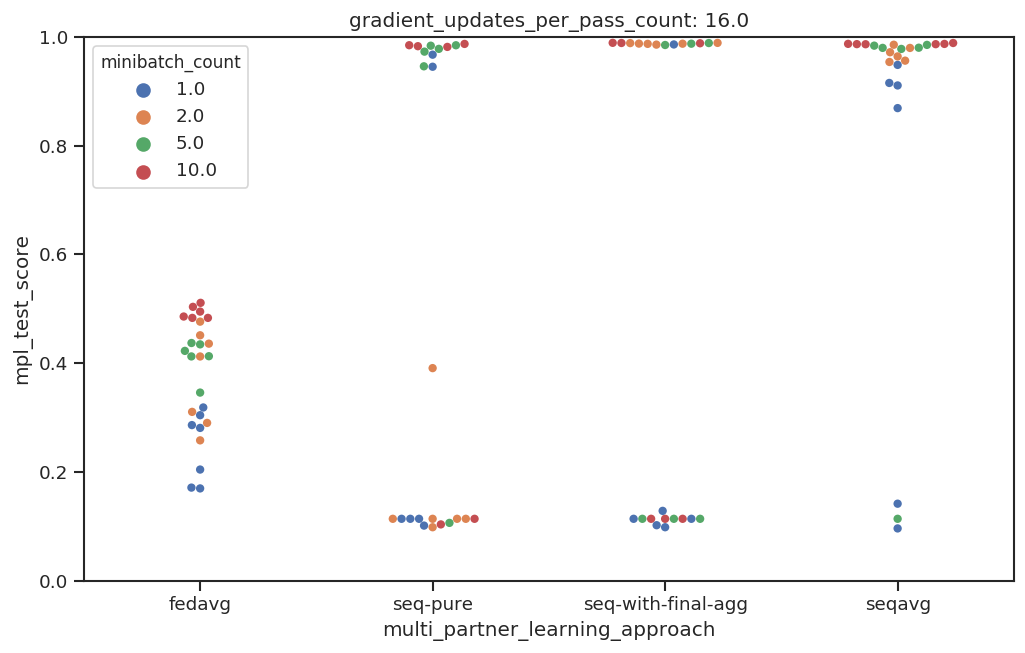

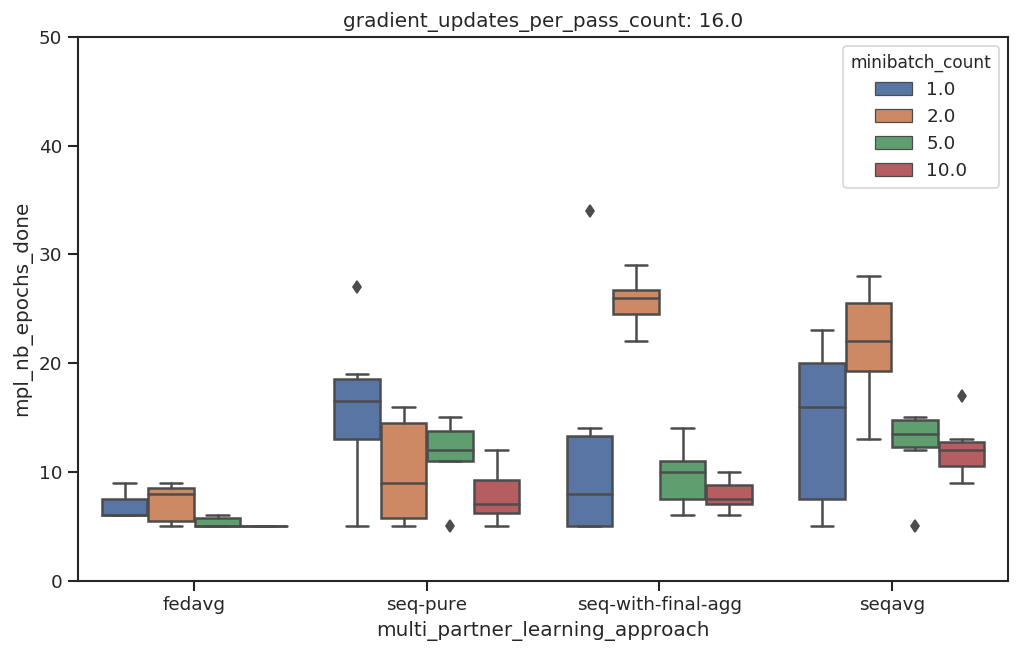

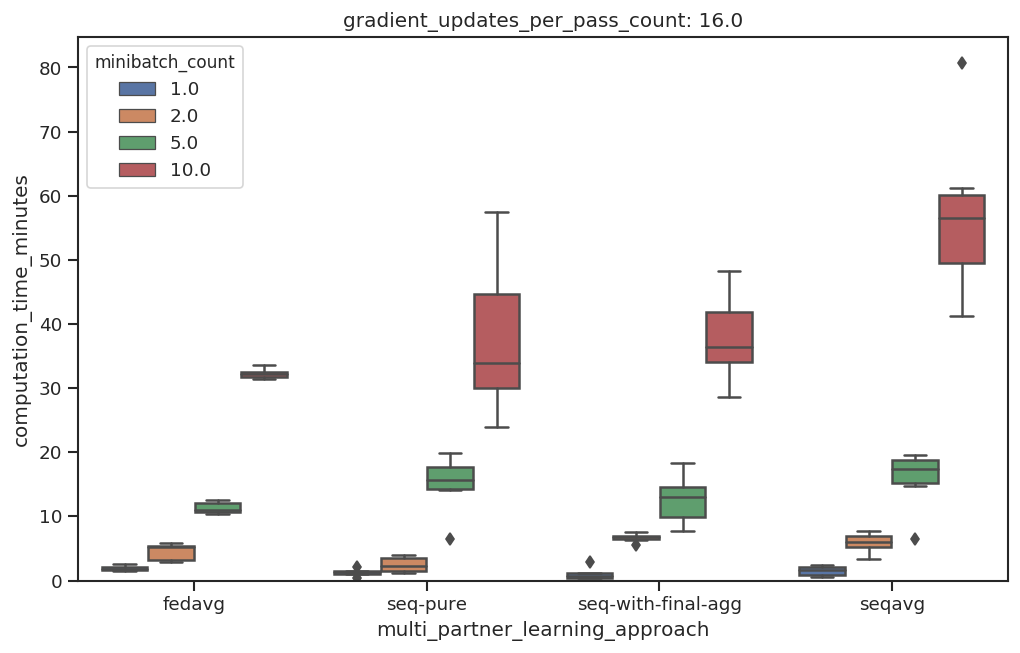

In [59]:
# Plot loop
for amounts_per_partner in amounts_per_partner_list:
    for gradient_updates_per_pass_count in gradient_updates_per_pass_count_list:
        
        current_df = df[(df.amounts_per_partner == amounts_per_partner) &
                        (df.gradient_updates_per_pass_count == gradient_updates_per_pass_count)]

        sns.set(style="ticks")
        #current_df.info()
        print("################################################")
        title = "gradient_updates_per_pass_count: " + str(gradient_updates_per_pass_count)
        print(title)

        plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        ax = sns.swarmplot(x="multi_partner_learning_approach", y="mpl_test_score", hue="minibatch_count",
                           data=current_df)
        plt.ylim([0, 1])

        plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        ax = sns.boxplot(x="multi_partner_learning_approach", y="mpl_nb_epochs_done", hue="minibatch_count",
                           data=current_df)
        plt.ylim([0, 50])


        ax = plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        sns.boxplot(x="multi_partner_learning_approach", y="computation_time_minutes", hue="minibatch_count",
                         data=current_df)
        plt.ylim(bottom=0)


        plt.show()
    